# Categorical plot + averaging in the same category

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the parallelism hint categories
categories = {
    "XS": range(1, 8),
    "S": range(8, 16),
    "M": range(16, 32)
}

# Function to determine the category based on parallelism hint
def get_category(parallelism_hint):
    for category, range_values in categories.items():
        if parallelism_hint in range_values:
            return category
    return None

# Directory containing the JSON files
directory = "/content/tmp"

# Dictionaries to store the aggregated values
proc_mean_data = defaultdict(lambda: defaultdict(list))
e2e_mean_data = defaultdict(lambda: defaultdict(list))

# Read and process each JSON file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        # Extract the query name and parallelism hint from the filename
        query_name, parallelism_hint_str = filename.rsplit("-", 1)
        parallelism_hint = int(parallelism_hint_str.split(".")[0])

        # Load the JSON data from the file
        with open(os.path.join(directory, filename)) as file:
            data = json.load(file)
            data = json.loads(data)

        # Get the category for the parallelism hint
        category = get_category(parallelism_hint)

        if category:
            # Aggregate the proc-mean and e2e-mean based on the query name and category
            proc_mean_data[query_name][category].append(data["proc-mean"])
            e2e_mean_data[query_name][category].append(data["e2e-mean"])

# Function to calculate the average values for each category
def calculate_averages(data):
    averages = {}
    for query_name, categories in data.items():
        averages[query_name] = {}
        for category, values in categories.items():
            averages[query_name][category] = np.mean(values)
    return averages

# Calculate the averages for proc-mean and e2e-mean
proc_mean_averages = calculate_averages(proc_mean_data)
e2e_mean_averages = calculate_averages(e2e_mean_data)

'''
# Plotting the histograms for proc-mean
plt.figure(figsize=(10, 6))
for query_name, category_data in proc_mean_averages.items():
    # Ensure categories are in the order [XS, S, M]
    categories = ["XS", "S", "M"]
    means = [category_data.get(cat, 0) for cat in categories]  # Use get to handle missing categories
    plt.bar(categories, means, label=query_name)
plt.xlabel('Parallelism Hint Category')
plt.ylabel('Average proc-mean')
plt.title('Average proc-mean by Parallelism Hint Category')
plt.legend()
plt.show()

# Plotting the histograms for e2e-mean
plt.figure(figsize=(10, 6))
for query_name, category_data in e2e_mean_averages.items():
    # Ensure categories are in the order [XS, S, M]
    categories = ["XS", "S", "M"]
    means = [category_data.get(cat, 0) for cat in categories]  # Use get to handle missing categories
    plt.bar(categories, means, label=query_name)
plt.xlabel('Parallelism Hint Category')
plt.ylabel('Average e2e-mean')
plt.title('Average e2e-mean by Parallelism Hint Category')
plt.legend()
plt.show()
'''

'\n# Plotting the histograms for proc-mean\nplt.figure(figsize=(10, 6))\nfor query_name, category_data in proc_mean_averages.items():\n    # Ensure categories are in the order [XS, S, M]\n    categories = ["XS", "S", "M"]\n    means = [category_data.get(cat, 0) for cat in categories]  # Use get to handle missing categories\n    plt.bar(categories, means, label=query_name)\nplt.xlabel(\'Parallelism Hint Category\')\nplt.ylabel(\'Average proc-mean\')\nplt.title(\'Average proc-mean by Parallelism Hint Category\')\nplt.legend()\nplt.show()\n\n# Plotting the histograms for e2e-mean\nplt.figure(figsize=(10, 6))\nfor query_name, category_data in e2e_mean_averages.items():\n    # Ensure categories are in the order [XS, S, M]\n    categories = ["XS", "S", "M"]\n    means = [category_data.get(cat, 0) for cat in categories]  # Use get to handle missing categories\n    plt.bar(categories, means, label=query_name)\nplt.xlabel(\'Parallelism Hint Category\')\nplt.ylabel(\'Average e2e-mean\')\nplt.tit

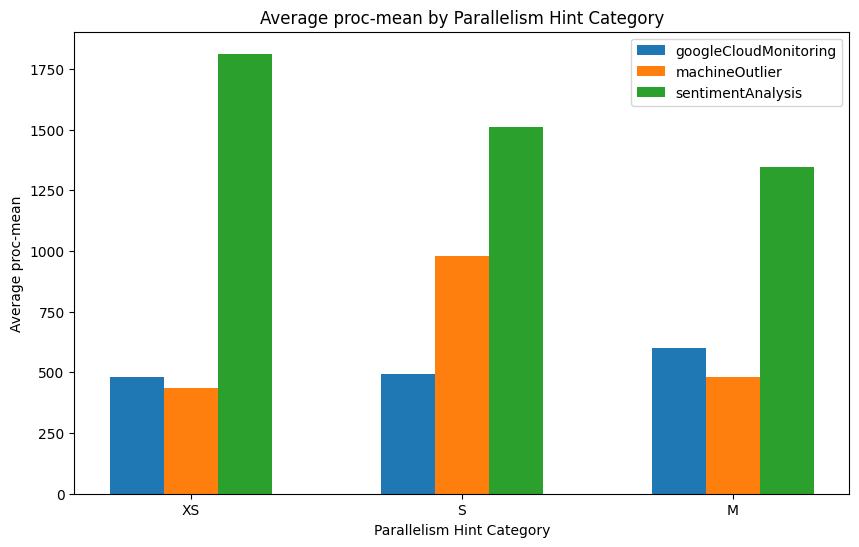

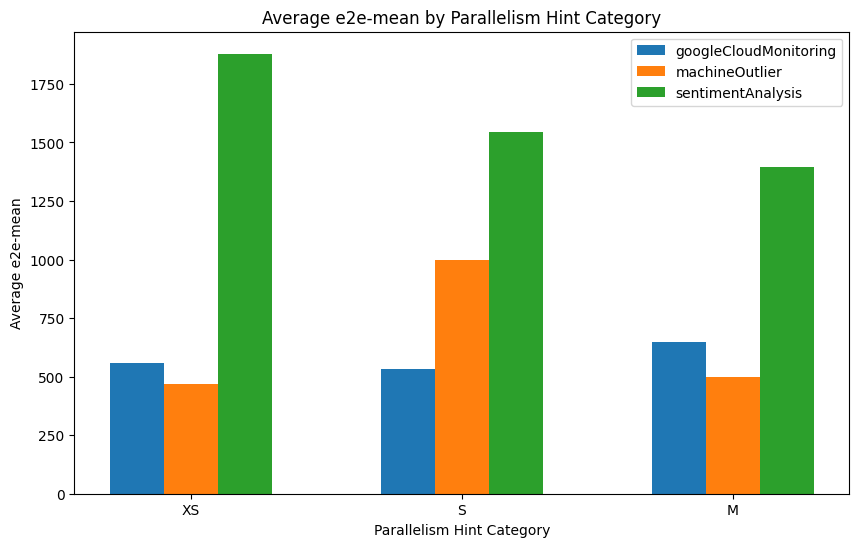

In [8]:
import numpy as np

# Define the order of categories
categories = ["XS", "S", "M"]
category_indices = np.arange(len(categories))  # Numerical indices for the categories

# Bar width
bar_width = 0.2

# Plotting the histograms for proc-mean
plt.figure(figsize=(10, 6))

for i, (query_name, category_data) in enumerate(proc_mean_averages.items()):
    means = [category_data.get(cat, 0) for cat in categories]  # Use get to handle missing categories
    plt.bar(category_indices + i * bar_width, means, width=bar_width, label=query_name)

plt.xlabel('Parallelism Hint Category')
plt.ylabel('Average proc-mean')
plt.title('Average proc-mean by Parallelism Hint Category')
plt.xticks(category_indices + bar_width * (len(proc_mean_averages) - 1) / 2, categories)
plt.legend()
plt.show()

# Plotting the histograms for e2e-mean
plt.figure(figsize=(10, 6))

for i, (query_name, category_data) in enumerate(e2e_mean_averages.items()):
    means = [category_data.get(cat, 0) for cat in categories]
    plt.bar(category_indices + i * bar_width, means, width=bar_width, label=query_name)

plt.xlabel('Parallelism Hint Category')
plt.ylabel('Average e2e-mean')
plt.title('Average e2e-mean by Parallelism Hint Category')
plt.xticks(category_indices + bar_width * (len(e2e_mean_averages) - 1) / 2, categories)
plt.legend()
plt.show()
